# Train test split

This notebooks explains how to split a dataset into train and test sets with segmentation masks as well as bounding boxes.

In [3]:
import bboxconverter as bc

# Input file path
input_path = '../examples/balloon/annotations.json'

# Output file path
output_path = '../examples/balloon/'

parser = bc.read_coco(input_path)

parser.export(
    output_path,
    format="coco",
    split=True,
)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
COCO categories: 
balloon



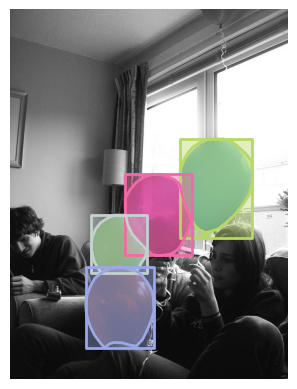

In [4]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from pycocotools.coco import COCO

# Load COCO annotations
workdir = '../examples/balloon/train'
annFile = f'{workdir}/train.json'
coco = COCO(annFile)
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print(f'COCO categories: \n{" ".join(nms)}\n')

# Get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['balloon'])
imgIds = coco.getImgIds(catIds=catIds)
img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]

# Load and display image
I = io.imread(
    f'{workdir}/{img["file_name"]}'
)
plt.imshow(I)
plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)